# Project 8: Iphone Purchase prediction data

Objective: To predict the purchase of Iphones

In [1]:
## importing Libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('H:\Top Mentor Course\Assignment\Decision Tree  - Assignment -4\iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# make a copy of data'
df=data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.shape

(400, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
# checking any missing/null values
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [7]:
df.duplicated().sum()

20

There are 20 duplicate columns in the dataset

In [8]:
#let's drop the duplicate data
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(380, 4)

So, The duplicated rows have been droppd from the data

# Exploratory data analysis

In [10]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [11]:
df.Gender.value_counts()

Female    198
Male      182
Name: Gender, dtype: int64

In [12]:
df.groupby(['Gender','Purchase Iphone']).size()

Gender  Purchase Iphone
Female  0                  121
        1                   77
Male    0                  119
        1                   63
dtype: int64

Out of 198 Females, Iphone is purchased by 77.
Out of 182 Females, Iphone is purchased by 63.

Text(0.5, 1.0, 'Gender wise Iphones Purchased')

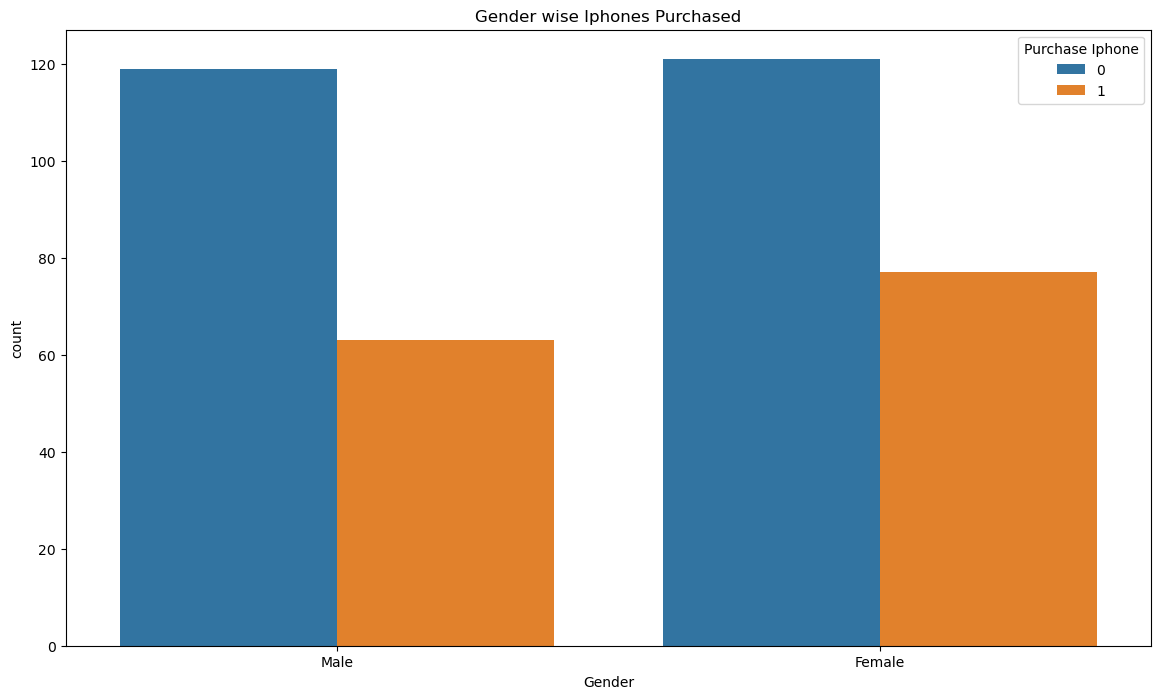

In [13]:
# Gender wise Iphones Purchased 
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Gender',hue='Purchase Iphone')
plt.savefig('Gender wise Iphones Purchased.jpg',bbox_inches='tight',dpi=200)
plt.title('Gender wise Iphones Purchased')

Iphone is purchased more by females compare to male.

Text(0.5, 1.0, 'Gender wise Salary')

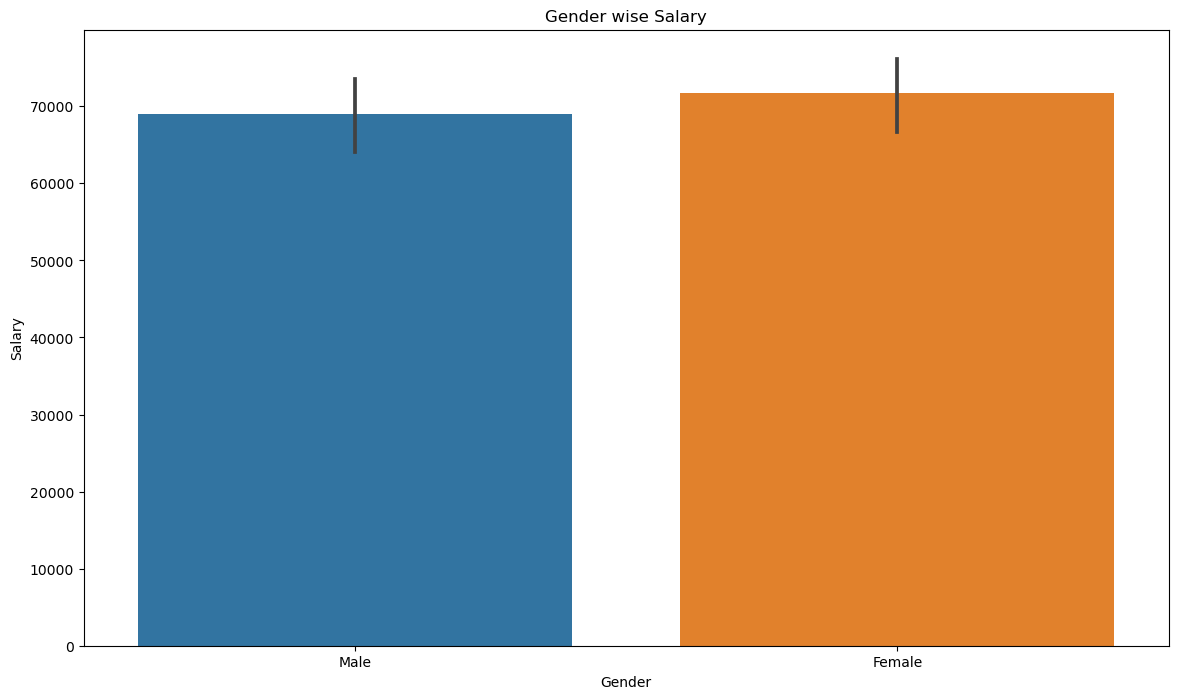

In [14]:
# Gender wise Salary
plt.figure(figsize=(14,8))
sns.barplot(data=df,y='Salary',x='Gender')
plt.savefig('Gender wise Salary.jpg',bbox_inches='tight',dpi=200)
plt.title('Gender wise Salary')

Females has more compared to male.

Text(0.5, 1.0, 'Gender-salary wise Iphones purchased')

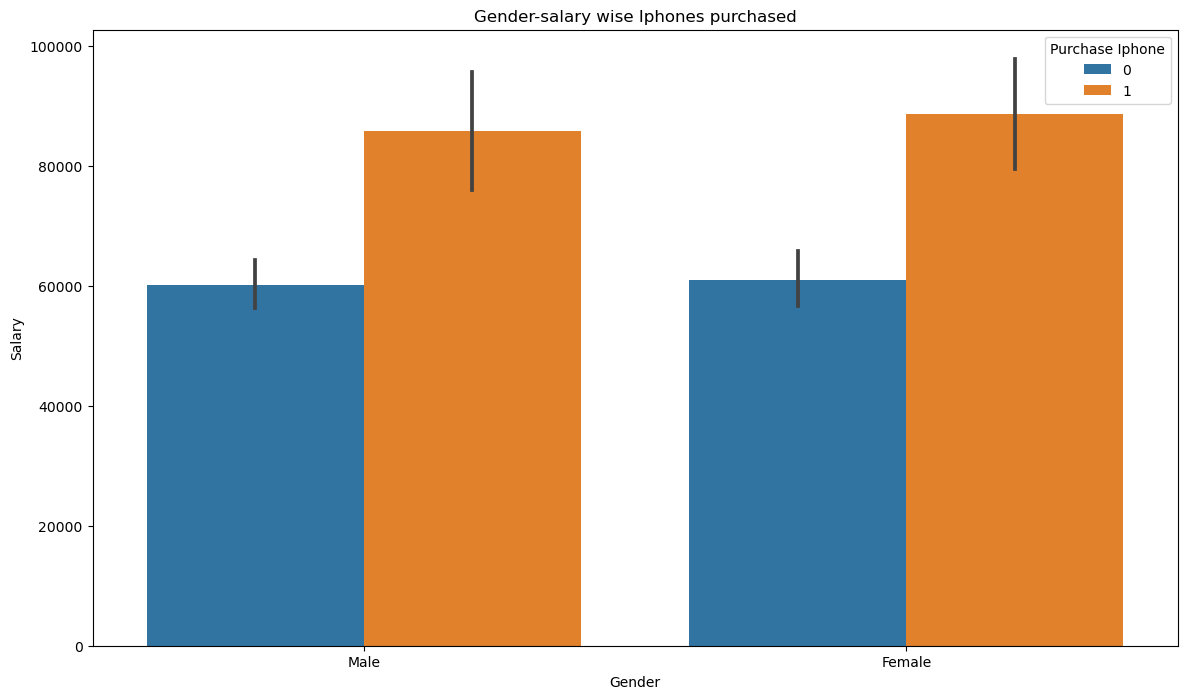

In [15]:
# Gender-salary wise Iphones Purchased
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='Gender',y='Salary',hue='Purchase Iphone')
plt.savefig('Gender-salary wise Iphones purchased.jpg',bbox_inches='tight',dpi=200)
plt.title('Gender-salary wise Iphones purchased')

Genders with more salary are likely to purchase Iphones.
Females have more salaries and hence purchased more Iphones than males.

Text(0.5, 1.0, 'Gender-age wise Iphones purchased')

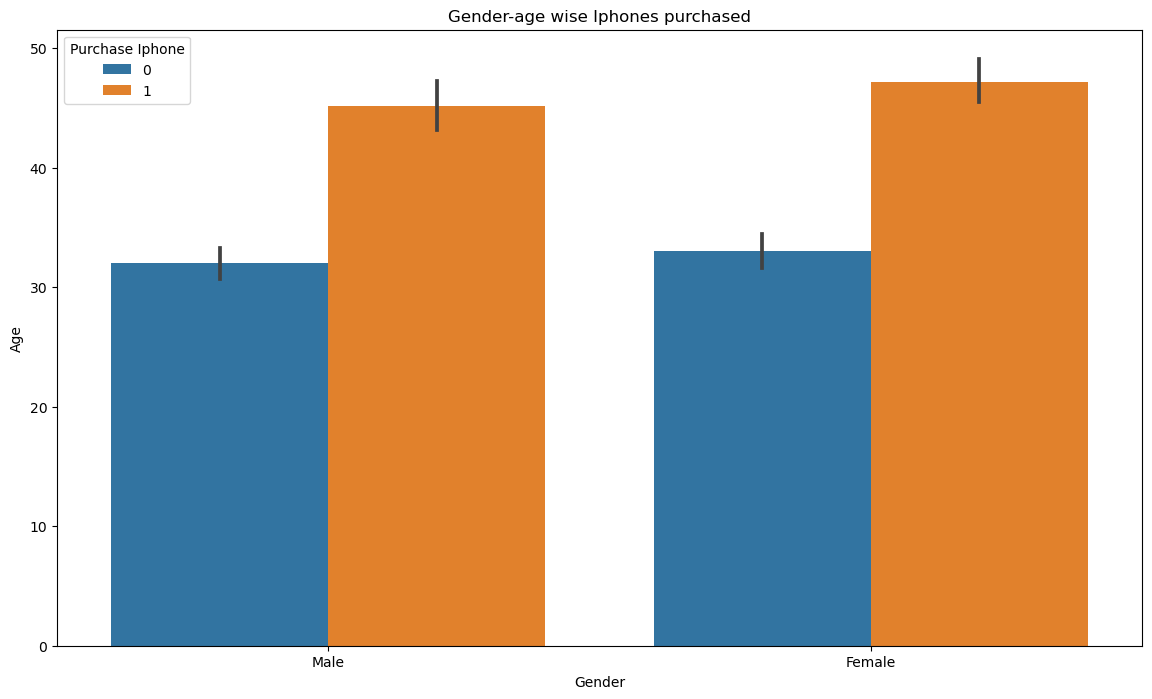

In [16]:
# Gender-age wise Iphones Purchased
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='Gender',y='Age',hue='Purchase Iphone')
plt.savefig('Gender-age wise Iphones purchased.jpg',bbox_inches='tight',dpi=200)
plt.title('Gender-age wise Iphones purchased')

Text(0.5, 1.0, 'Age-Salary wise Iphones purchased')

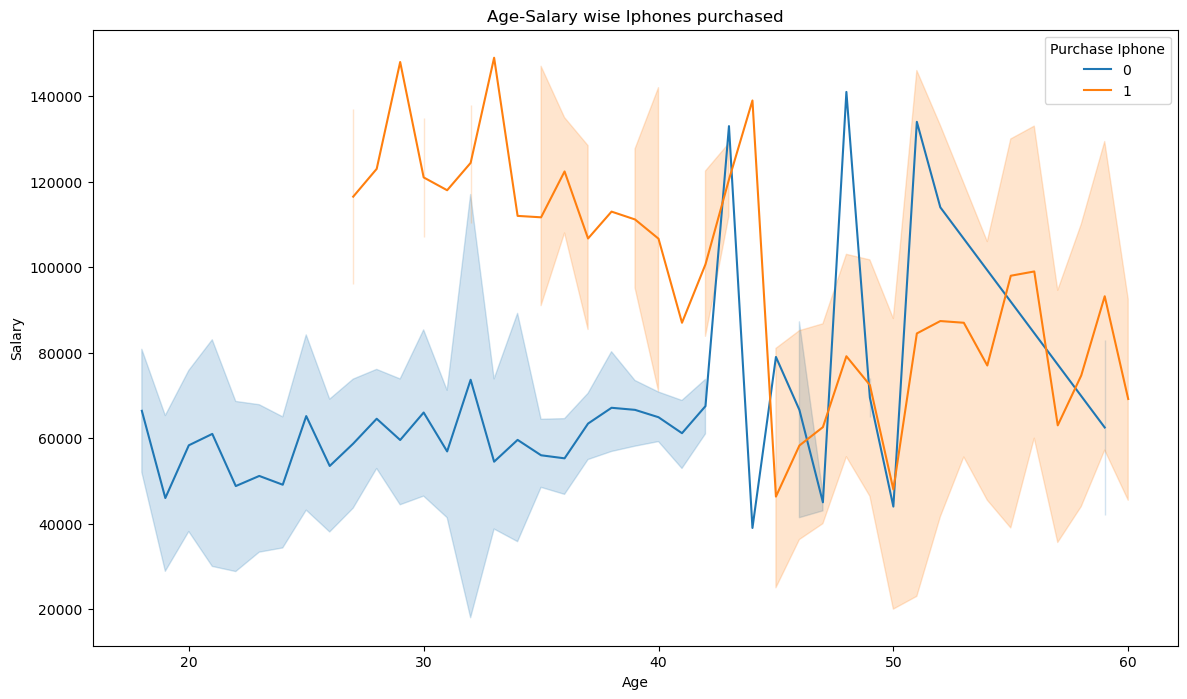

In [17]:
# Age-Salary wise Iphones Purchased
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Age',y='Salary',hue='Purchase Iphone')
plt.savefig('Age-Salary wise Iphones purchased.jpg',bbox_inches='tight',dpi=200)
plt.title('Age-Salary wise Iphones purchased')

Genders with high salaries in 27-45 years of age have purchased Iphones.
Genders having age group above 45 years purchased Iphones irrespective of their salaries.

In [18]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_25084\354769727.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_25084\354769727.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_25084\3

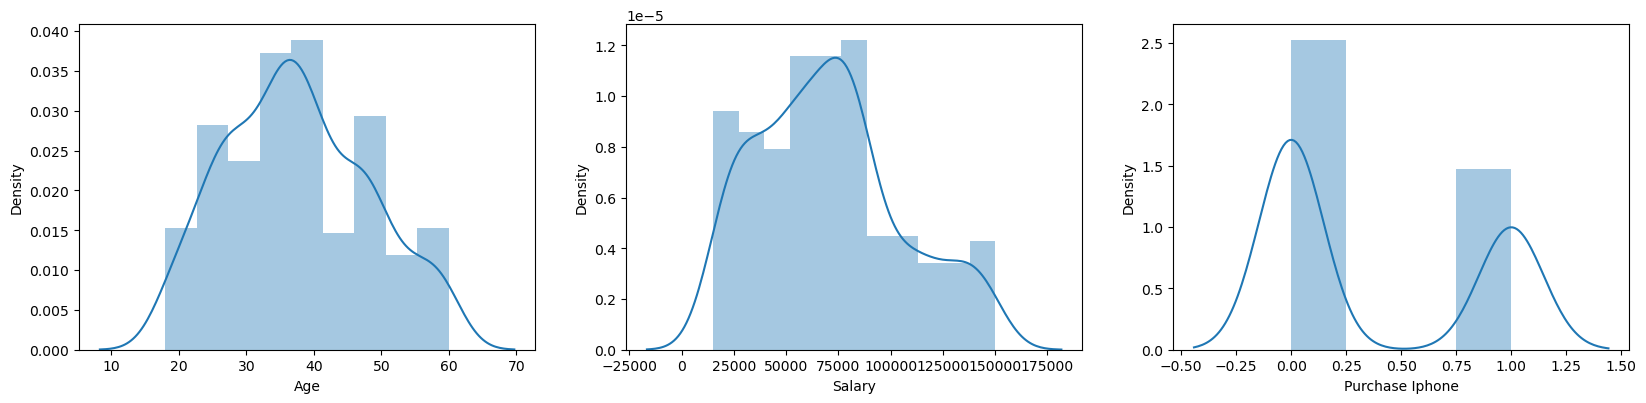

In [19]:
# let's check the distribution of the features
# A univariate distrubution of numerical features
dd=df[['Age', 'Salary', 'Purchase Iphone']]
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in dd:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    #plt.title('distribution of',col)
    plot_num+=1
    
plt.savefig('Distribution data.jpg',bbox_inches='tight',dpi=200)
plt.show()

All the features in data are distributed normally

In [21]:
df.skew()

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_25084\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age                0.239843
Salary             0.461275
Purchase Iphone    0.547709
dtype: float64

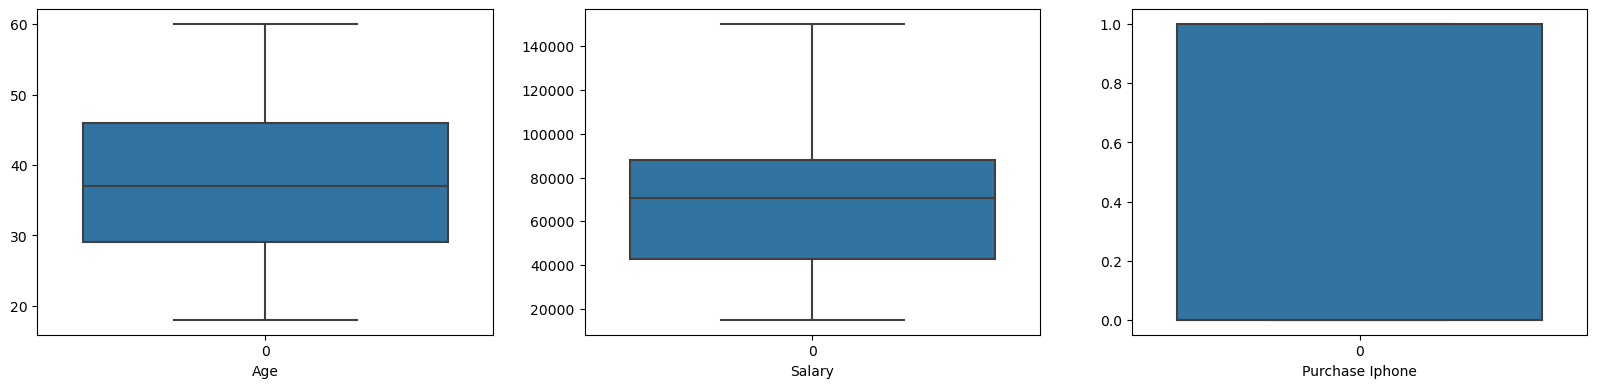

In [22]:
# let's check for outliers in the data
dd=df[['Age', 'Salary', 'Purchase Iphone']]
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in dd:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(df[col])
    plt.xlabel(col)
    #plt.title('distribution of',col)
    plot_num+=1
    
plt.savefig('Boxplot data.jpg',bbox_inches='tight',dpi=200)
plt.show()

There are no outliers in the data

In [24]:
# correlation among the features
df.corr()

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_25084\1433282458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.170588,0.626505
Salary,0.170588,1.000000,0.374928
Purchase Iphone,0.626505,0.374928,1.000000


Both age and salary are correlated with the purchase of iphones.

In [25]:
# lets convert one categorical column to numeric one
dum=pd.get_dummies(df['Gender'])

In [26]:
df1=pd.concat([dum,df], axis=1)

In [27]:
df1.drop(['Gender'],axis=1,inplace=True)

In [28]:
df1.head()

,Female,Male,Age,Salary,Purchase Iphone
0,0,1,19,19000,0
1,0,1,35,20000,0
2,1,0,26,43000,0
3,1,0,27,57000,0
4,0,1,19,76000,0


# Sampling the data


In [29]:
x=df1.iloc[:,:4]
y=df1.iloc[:,-1:]

In [30]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
x_sc=sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)

In [34]:
x_train.shape,x_test.shape

((304, 4), (76, 4))

# Model Building

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [37]:
model_fit_clf=clf.fit(x_train,y_train)

In [38]:
pred=model_fit_clf.predict(x_test)

In [39]:
pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [40]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['actual']=y_test.values

In [41]:
dd.head()

,predicted,actual
0,1,0
1,0,1
2,1,1
3,0,0
4,1,1


In [42]:
### Model Dynamics

In [43]:
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

In [44]:
print('Model: Decision Tree')

print('The accuracy of the model is:',round(accuracy_score(dd['actual'],dd['predicted']),2))
print('The precision of the model is:',round(precision_score(dd['actual'],dd['predicted']),2))
print('The confusion matrix is :',confusion_matrix(dd['actual'],dd['predicted']))
print('The classification report is :\n',classification_report(dd['actual'],dd['predicted']))

Model: Decision Tree
The accuracy of the model is: 0.92
The precision of the model is: 0.92
The confusion matrix is : [[46  2]
 [ 4 24]]
The classification report is :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.92      0.86      0.89        28

    accuracy                           0.92        76
   macro avg       0.92      0.91      0.91        76
weighted avg       0.92      0.92      0.92        76



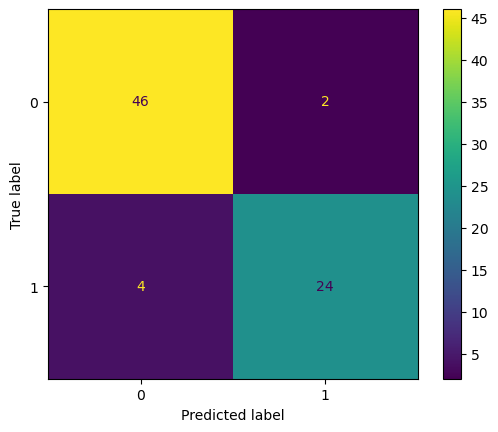

In [45]:
conf=confusion_matrix(dd['actual'],dd['predicted'])
ConfusionMatrixDisplay(conf).plot()

<Axes: >

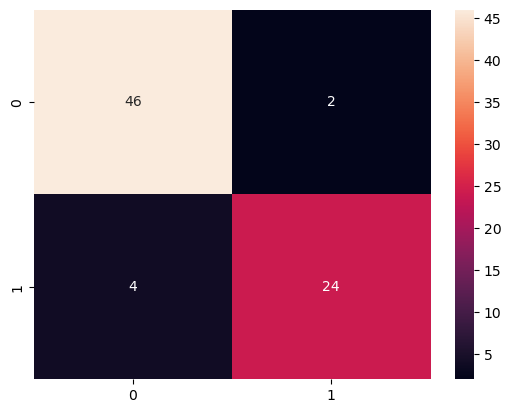

In [46]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

# Saving the model

In [47]:
import joblib

In [48]:
filename='Decesion _Tree_iphone_purchase_project.sav'

In [49]:
joblib.dump(model_fit_clf,filename)

['Decesion _Tree_iphone_purchase_project.sav']